## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from datetime import datetime

In [2]:
os.getcwd()

'C:\\Users\\Kalmerrick\\Documents\\JC Treasury Analysis\\CSIO'

In [3]:
PATH = 'Data/'

In [4]:
os.listdir(PATH)

['All Sample v4 csioImp.csv',
 'All Sample v4.csv',
 'Community Orders.xlsx',
 'penaltyCountDaily.csv',
 'penaltyCountDailyPlay.xlsx',
 'PenaltyCountJuris_raw.csv',
 'PenaltyCountJuris_raw_analysis.xlsx',
 'penaltyCountMonthly.csv']

In [5]:
#import csv and parse dates for timeseries analysis
train = pd.read_csv(f'{PATH}PenaltyCountJuris_raw.csv', low_memory=False)

In [6]:
# Function that displays all the columns of a data frame
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
train.shape
#train.info()

(51, 83)

In [8]:
train.head()

,JurisdictionTypeCode,SentenceType,1/01/2012,1/02/2012,1/03/2012,1/04/2012,1/05/2012,1/06/2012,1/07/2012,1/08/2012,...,1/12/2017,1/01/2018,1/02/2018,1/03/2018,1/04/2018,1/05/2018,1/06/2018,1/07/2018,1/08/2018,1/09/2018
0,CC,Community Based Order,6.0,14.0,10.0,3.0,11.0,5.0,6.0,4.0,...,3.0,3.0,6.0,3.0,5.0,7.0,2.0,6.0,7.0,NaN
1,CC,Conditional Release Order,7.0,9.0,7.0,9.0,6.0,5.0,7.0,9.0,...,5.0,6.0,11.0,4.0,6.0,4.0,6.0,13.0,4.0,NaN
2,CC,Conditional Suspended Imprisonment,1.0,2.0,5.0,NaN,2.0,4.0,NaN,2.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN
3,CC,Fines,87.0,113.0,89.0,91.0,98.0,75.0,78.0,90.0,...,53.0,68.0,52.0,47.0,35.0,41.0,22.0,32.0,23.0,3.0
4,CC,Good Behaviour Bond,3.0,1.0,2.0,3.0,2.0,2.0,1.0,NaN,...,1.0,2.0,4.0,3.0,2.0,3.0,1.0,3.0,NaN,1.0


In [9]:
# Filter out data where the jurisdiction is MC
mask = (train['JurisdictionTypeCode'] == 'MC') 

In [10]:
# Create a new DataFrame with only MC data
train2 = pd.DataFrame(train[mask]).copy()

In [11]:
train2.shape

(14, 83)

In [12]:
# Drop the 'JurisdictionTypeCode' column
train2.drop(columns=['JurisdictionTypeCode'],axis=1,inplace=True)

In [13]:
# Transpose the data
train3 = pd.DataFrame(train2.set_index('SentenceType').transpose()).copy()

In [14]:
train3.head()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond
1/01/2012,166.0,174.0,NaN,5730.0,NaN,136.0,NaN,43.0,1.0,7.0,196.0,6.0,NaN,NaN
1/02/2012,177.0,211.0,NaN,5658.0,3.0,198.0,NaN,54.0,2.0,13.0,261.0,5.0,NaN,NaN
1/03/2012,200.0,203.0,NaN,5755.0,4.0,195.0,NaN,49.0,3.0,14.0,216.0,5.0,NaN,NaN
1/04/2012,193.0,131.0,NaN,5139.0,9.0,171.0,NaN,45.0,NaN,9.0,183.0,6.0,NaN,NaN
1/05/2012,236.0,168.0,NaN,6103.0,2.0,167.0,NaN,60.0,NaN,11.0,196.0,4.0,NaN,NaN


In [15]:
train3.reset_index(inplace=True)

In [16]:
# Rename required columns
train3.rename(columns={'index':'Date'}, inplace=True)

In [17]:
train3.head()

SentenceType,Date,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond
0,1/01/2012,166.0,174.0,NaN,5730.0,NaN,136.0,NaN,43.0,1.0,7.0,196.0,6.0,NaN,NaN
1,1/02/2012,177.0,211.0,NaN,5658.0,3.0,198.0,NaN,54.0,2.0,13.0,261.0,5.0,NaN,NaN
2,1/03/2012,200.0,203.0,NaN,5755.0,4.0,195.0,NaN,49.0,3.0,14.0,216.0,5.0,NaN,NaN
3,1/04/2012,193.0,131.0,NaN,5139.0,9.0,171.0,NaN,45.0,NaN,9.0,183.0,6.0,NaN,NaN
4,1/05/2012,236.0,168.0,NaN,6103.0,2.0,167.0,NaN,60.0,NaN,11.0,196.0,4.0,NaN,NaN


In [18]:
# Need to change the 'Date' columnn into a meaningful timeseries format
# Analyse format
delta1 = train3.iloc[1]['Date'];delta1

'1/02/2012'

In [19]:
datetime.strptime(delta1, '%d/%m/%Y')

datetime.datetime(2012, 2, 1, 0, 0)

In [20]:
# Adjust the datetime format as months and days need to be switched!
train3.Date = pd.to_datetime(train3.Date, format = '%d/%m/%Y')

In [21]:
# Use the date as the index for timeseries analysis
train3.set_index('Date',inplace=True)

In [22]:
# Can filter for a specific period if required
#mask = (train3['Date'] > '2017-01-01 00:00:00')

In [23]:
#train4 = pd.DataFrame(train3[mask])
train4 = pd.DataFrame(train3).copy()

In [24]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2012-01-01 to 2018-09-01
Data columns (total 14 columns):
Community Based Order                 81 non-null float64
Conditional Release Order             81 non-null float64
Conditional Suspended Imprisonment    18 non-null float64
Fines                                 81 non-null float64
Good Behaviour Bond                   77 non-null float64
Imprisonment                          81 non-null float64
Imprisonment for Fines                62 non-null float64
Intensive Supervision Order           81 non-null float64
No Punishment                         35 non-null float64
Other                                 80 non-null float64
Suspended Imprisonment                81 non-null float64
Work and Development Order            60 non-null float64
Youth Community Based Order           2 non-null float64
Youth Good Behaviour Bond             1 non-null float64
dtypes: float64(14)
memory usage: 9.5 KB


In [25]:
train4.describe()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond
count,81.000000,81.000000,18.000000,81.000000,77.000000,81.000000,62.000000,81.000000,35.000000,80.000000,81.000000,60.000000,2.0,1.0
mean,229.432099,125.197531,28.722222,5594.481481,4.259740,202.469136,3.516129,66.432099,1.428571,21.637500,185.851852,3.416667,1.0,1.0
std,42.010397,36.919311,25.754053,894.755820,2.592512,37.708449,2.359091,13.720366,0.777844,14.995564,31.256644,2.688908,0.0,NaN
min,26.000000,1.000000,1.000000,168.000000,1.000000,32.000000,1.000000,10.000000,1.000000,4.000000,25.000000,1.000000,1.0,1.0
25%,207.000000,103.000000,1.000000,5316.000000,2.000000,179.000000,2.000000,60.000000,1.000000,12.000000,167.000000,1.000000,1.0,1.0
50%,229.000000,126.000000,33.500000,5730.000000,4.000000,199.000000,3.000000,68.000000,1.000000,15.500000,186.000000,3.000000,1.0,1.0
75%,249.000000,149.000000,55.500000,6055.000000,6.000000,227.000000,4.000000,73.000000,2.000000,28.250000,204.000000,5.000000,1.0,1.0
max,335.000000,211.000000,68.000000,6956.000000,13.000000,287.000000,11.000000,103.000000,4.000000,96.000000,261.000000,13.000000,1.0,1.0


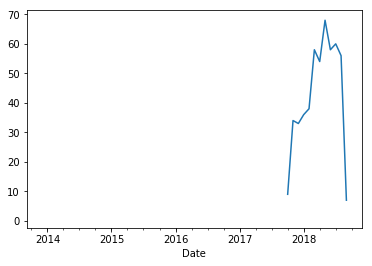

In [26]:
# Plot CSIOS, note only data from late October onwards for 'MC' & 'CSIO'
train4['Conditional Suspended Imprisonment'].plot()

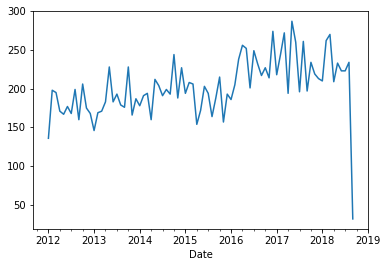

In [27]:
# Imprisonment data, note data for last month looks incomplete
train4['Imprisonment'].plot()

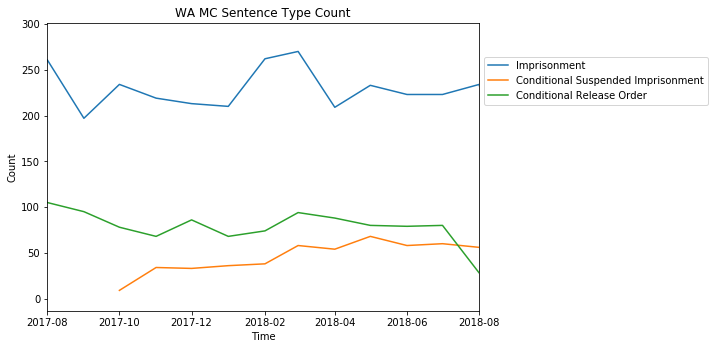

In [28]:
fig = plt.figure()
#fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.add_axes([0.1,0.1,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('WA MC Sentence Type Count')
ax.set_xlim(pd.Timestamp('2017-08-01'),pd.Timestamp('2018-08-01'))
ax.plot(train4['Imprisonment'], label="Imprisonment")
ax.plot(train4['Conditional Suspended Imprisonment'], label="Conditional Suspended Imprisonment")
ax.plot(train4['Conditional Release Order'], label="Conditional Release Order")
ax.legend(bbox_to_anchor=(1.0,0.9))

## Examine variable relationships

In [29]:
# Correlation CSIO to Imprisonment
# corr based off Pearson tbc
train4['Conditional Suspended Imprisonment'].corr(train4['Imprisonment'])

0.499838585425289

In [30]:
# Overall variable correlation
train4.corr()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond
SentenceType,,,,,,,,,,,,,,
Community Based Order,1.000000,-0.097324,0.583110,0.627183,0.227590,0.667083,-0.088445,0.578504,0.286279,0.509321,0.468948,0.100916,NaN,NaN
Conditional Release Order,-0.097324,1.000000,-0.406801,0.315926,-0.218615,-0.163966,0.107658,-0.199856,0.065907,-0.454585,0.313432,-0.070078,NaN,NaN
Conditional Suspended Imprisonment,0.583110,-0.406801,1.000000,0.130348,0.601445,0.499839,0.087803,0.392583,0.533718,0.654360,-0.051152,-0.007245,NaN,NaN
Fines,0.627183,0.315926,0.130348,1.000000,0.241786,0.535531,0.093517,0.395103,0.255803,0.237647,0.689691,0.248504,NaN,NaN
Good Behaviour Bond,0.227590,-0.218615,0.601445,0.241786,1.000000,0.326561,0.167539,0.219137,-0.040706,0.356380,0.188759,0.054725,NaN,NaN
Imprisonment,0.667083,-0.163966,0.499839,0.535531,0.326561,1.000000,-0.151315,0.643384,0.120555,0.621372,0.622949,0.057582,NaN,NaN
Imprisonment for Fines,-0.088445,0.107658,0.087803,0.093517,0.167539,-0.151315,1.000000,0.041060,0.000618,-0.192833,-0.304559,-0.022522,NaN,NaN
Intensive Supervision Order,0.578504,-0.199856,0.392583,0.395103,0.219137,0.643384,0.041060,1.000000,0.016598,0.347722,0.379040,0.158041,NaN,NaN
No Punishment,0.286279,0.065907,0.533718,0.255803,-0.040706,0.120555,0.000618,0.016598,1.000000,-0.000877,0.301854,0.216245,NaN,NaN


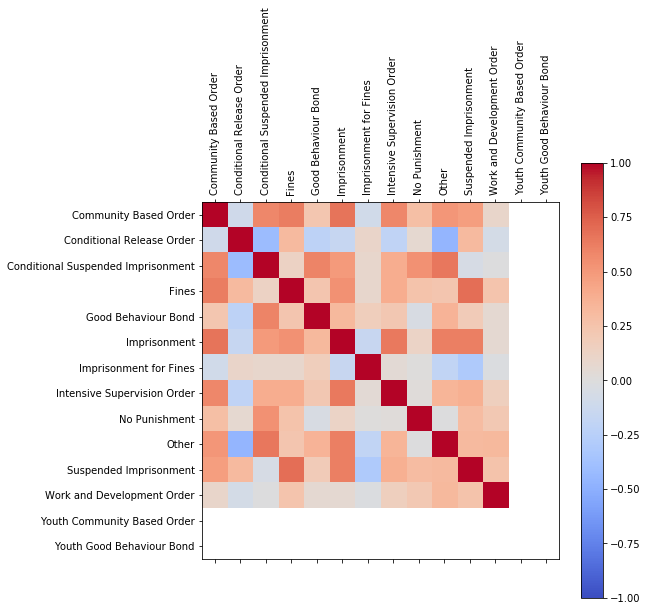

In [31]:
corr = train4.corr()
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(111)
cax = ax2.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig2.colorbar(cax)
ticks = np.arange(0,len(train4.columns),1)
ax2.set_xticks(ticks)
plt.xticks(rotation=90)
ax2.set_yticks(ticks)
ax2.set_xticklabels(train4.columns)
ax2.set_yticklabels(train4.columns)
plt.show()

In [32]:
train4.corr(method='spearman')

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond
SentenceType,,,,,,,,,,,,,,
Community Based Order,1.000000,-0.351002,0.671160,0.495502,0.207568,0.534949,-0.098926,0.446652,0.241928,0.559380,0.241356,0.061156,NaN,NaN
Conditional Release Order,-0.351002,1.000000,-0.542473,-0.145150,-0.255641,-0.443730,0.138404,-0.468322,0.049236,-0.532139,-0.009353,-0.126367,NaN,NaN
Conditional Suspended Imprisonment,0.671160,-0.542473,1.000000,0.476672,0.614794,0.585883,0.014192,0.417125,0.623610,0.723685,-0.339703,-0.050853,NaN,NaN
Fines,0.495502,-0.145150,0.476672,1.000000,0.341747,0.520264,0.101040,0.329802,0.232527,0.419192,0.485789,0.266860,NaN,NaN
Good Behaviour Bond,0.207568,-0.255641,0.614794,0.341747,1.000000,0.372786,0.170170,0.246177,-0.133439,0.311324,0.203935,0.152616,NaN,NaN
Imprisonment,0.534949,-0.443730,0.585883,0.520264,0.372786,1.000000,-0.125431,0.515209,0.110522,0.610856,0.497871,-0.041356,NaN,NaN
Imprisonment for Fines,-0.098926,0.138404,0.014192,0.101040,0.170170,-0.125431,1.000000,0.072127,0.041188,-0.178267,-0.266511,0.063195,NaN,NaN
Intensive Supervision Order,0.446652,-0.468322,0.417125,0.329802,0.246177,0.515209,0.072127,1.000000,-0.000706,0.356965,0.168902,0.141004,NaN,NaN
No Punishment,0.241928,0.049236,0.623610,0.232527,-0.133439,0.110522,0.041188,-0.000706,1.000000,0.014212,0.373074,0.340390,NaN,NaN


In [33]:
#CSIO Imprisonment data not null
train4[['Conditional Suspended Imprisonment','Imprisonment']][train4['Conditional Suspended Imprisonment'].notnull()].head()

SentenceType,Conditional Suspended Imprisonment,Imprisonment
Date,,
2013-12-01,1.0,187.0
2014-04-01,1.0,160.0
2015-01-01,1.0,194.0
2015-04-01,1.0,154.0
2016-03-01,1.0,238.0


Percentage change in Sentence types over time

In [34]:
#CSIO & Imprisonment percentage change month on month rate
train4[['Conditional Suspended Imprisonment','Imprisonment']][train4['Conditional Suspended Imprisonment'].notnull()].pct_change()

SentenceType,Conditional Suspended Imprisonment,Imprisonment
Date,,
2013-12-01,NaN,NaN
2014-04-01,0.000000,-0.144385
2015-01-01,0.000000,0.212500
2015-04-01,0.000000,-0.206186
2016-03-01,0.000000,0.545455
2016-06-01,0.000000,-0.155462
2017-10-01,8.000000,0.164179
2017-11-01,2.777778,-0.064103
2017-12-01,-0.029412,-0.027397


In [35]:
# Create a new column deriving CSIO monthly percentage increase
train4['CSIO Increase'] = ((train4['Conditional Suspended Imprisonment'] / train4['Conditional Suspended Imprisonment'].shift(1)) - 1) *100

In [36]:
# Create a new column deriving Imprisonment monthly percentage increase
train4['Imprisonment Increase'] = ((train4['Imprisonment'] / train4['Imprisonment'].shift(1)) - 1) *100

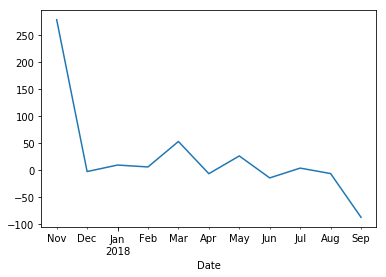

In [37]:
# Plot CSIO Increase Rate
train4['CSIO Increase'].plot()

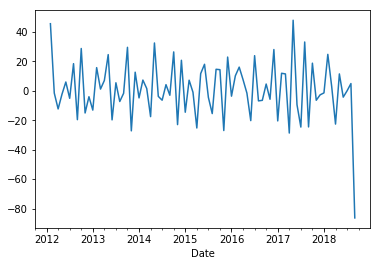

In [38]:
# Plot Imprisonment Increase Rate
train4['Imprisonment Increase'].plot()

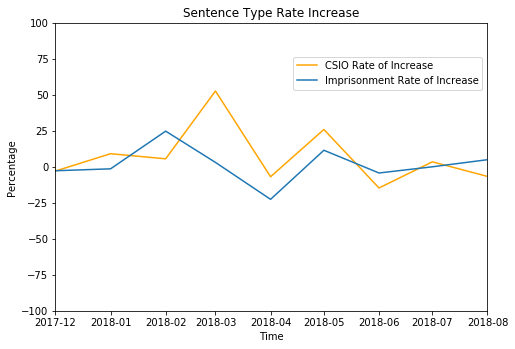

In [39]:
fig = plt.figure()
#fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.add_axes([0.1,0.1,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Percentage')
ax.set_title('Sentence Type Rate Increase')
ax.set_xlim(pd.Timestamp('2017-12-01'),pd.Timestamp('2018-08-01'))
ax.set_ylim(-100,100)
ax.plot(train4['CSIO Increase'], label="CSIO Rate of Increase", color = 'orange')
ax.plot(train4['Imprisonment Increase'], label="Imprisonment Rate of Increase")
ax.legend(bbox_to_anchor=(1.0,0.9))

In [40]:
# Create a new DataFrame with only Date and Type
train5 = pd.DataFrame(train4, columns = ['CSIO Increase', 'Imprisonment Increase'])

In [41]:
train5['CSIO Increase'].corr(train4['Imprisonment Increase'])

0.3217357038707188

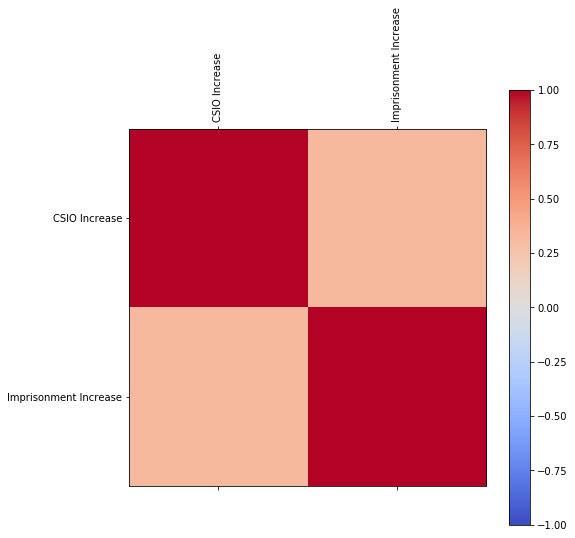

In [42]:
corr = train5.corr()
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(111)
cax = ax2.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig2.colorbar(cax)
ticks = np.arange(0,len(train5.columns),1)
ax2.set_xticks(ticks)
plt.xticks(rotation=90)
ax2.set_yticks(ticks)
ax2.set_xticklabels(train5.columns)
ax2.set_yticklabels(train5.columns)
plt.show()

In [43]:
train4.head()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,CSIO Increase,Imprisonment Increase
Date,,,,,,,,,,,,,,,,
2012-01-01,166.0,174.0,NaN,5730.0,NaN,136.0,NaN,43.0,1.0,7.0,196.0,6.0,NaN,NaN,NaN,NaN
2012-02-01,177.0,211.0,NaN,5658.0,3.0,198.0,NaN,54.0,2.0,13.0,261.0,5.0,NaN,NaN,NaN,45.588235
2012-03-01,200.0,203.0,NaN,5755.0,4.0,195.0,NaN,49.0,3.0,14.0,216.0,5.0,NaN,NaN,NaN,-1.515152
2012-04-01,193.0,131.0,NaN,5139.0,9.0,171.0,NaN,45.0,NaN,9.0,183.0,6.0,NaN,NaN,NaN,-12.307692
2012-05-01,236.0,168.0,NaN,6103.0,2.0,167.0,NaN,60.0,NaN,11.0,196.0,4.0,NaN,NaN,NaN,-2.339181


In [44]:
train6 = pd.DataFrame(train3).copy()

In [45]:
train6['Total'] = train3.sum(axis=1)

In [46]:
display_all(train6.tail())

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,Total
Date,,,,,,,,,,,,,,,
2018-05-01,335.0,80.0,68.0,6142.0,2.0,233.0,7.0,82.0,3.0,40.0,169.0,8.0,NaN,NaN,7169.0
2018-06-01,269.0,79.0,58.0,5629.0,9.0,223.0,4.0,68.0,1.0,36.0,162.0,2.0,NaN,NaN,6540.0
2018-07-01,278.0,80.0,60.0,6218.0,7.0,223.0,4.0,71.0,NaN,30.0,173.0,3.0,NaN,NaN,7147.0
2018-08-01,207.0,28.0,56.0,1521.0,5.0,234.0,NaN,89.0,NaN,28.0,137.0,NaN,NaN,NaN,2305.0
2018-09-01,26.0,1.0,7.0,168.0,1.0,32.0,NaN,10.0,NaN,NaN,25.0,NaN,NaN,NaN,270.0


In [47]:
train6a = pd.concat([train6,pd.DataFrame(train6.sum(axis=0),columns=['Grand Total']).T])

In [48]:
train6a.tail()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,Total
2018-06-01 00:00:00,269.0,79.0,58.0,5629.0,9.0,223.0,4.0,68.0,1.0,36.0,162.0,2.0,NaN,NaN,6540.0
2018-07-01 00:00:00,278.0,80.0,60.0,6218.0,7.0,223.0,4.0,71.0,NaN,30.0,173.0,3.0,NaN,NaN,7147.0
2018-08-01 00:00:00,207.0,28.0,56.0,1521.0,5.0,234.0,NaN,89.0,NaN,28.0,137.0,NaN,NaN,NaN,2305.0
2018-09-01 00:00:00,26.0,1.0,7.0,168.0,1.0,32.0,NaN,10.0,NaN,NaN,25.0,NaN,NaN,NaN,270.0
Grand Total,18584.0,10141.0,517.0,453153.0,328.0,16400.0,218.0,5381.0,50.0,1731.0,15054.0,205.0,2.0,1.0,521765.0


In [49]:
train6.describe()

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,Total
count,81.000000,81.000000,18.000000,81.000000,77.000000,81.000000,62.000000,81.000000,35.000000,80.000000,81.000000,60.000000,2.0,1.0,81.000000
mean,229.432099,125.197531,28.722222,5594.481481,4.259740,202.469136,3.516129,66.432099,1.428571,21.637500,185.851852,3.416667,1.0,1.0,6441.543210
std,42.010397,36.919311,25.754053,894.755820,2.592512,37.708449,2.359091,13.720366,0.777844,14.995564,31.256644,2.688908,0.0,NaN,988.310541
min,26.000000,1.000000,1.000000,168.000000,1.000000,32.000000,1.000000,10.000000,1.000000,4.000000,25.000000,1.000000,1.0,1.0,270.000000
25%,207.000000,103.000000,1.000000,5316.000000,2.000000,179.000000,2.000000,60.000000,1.000000,12.000000,167.000000,1.000000,1.0,1.0,6158.000000
50%,229.000000,126.000000,33.500000,5730.000000,4.000000,199.000000,3.000000,68.000000,1.000000,15.500000,186.000000,3.000000,1.0,1.0,6566.000000
75%,249.000000,149.000000,55.500000,6055.000000,6.000000,227.000000,4.000000,73.000000,2.000000,28.250000,204.000000,5.000000,1.0,1.0,6941.000000
max,335.000000,211.000000,68.000000,6956.000000,13.000000,287.000000,11.000000,103.000000,4.000000,96.000000,261.000000,13.000000,1.0,1.0,8034.000000


In [50]:
train6.columns

Index(['Community Based Order', 'Conditional Release Order',
       'Conditional Suspended Imprisonment', 'Fines', 'Good Behaviour Bond',
       'Imprisonment', 'Imprisonment for Fines', 'Intensive Supervision Order',
       'No Punishment', 'Other', 'Suspended Imprisonment',
       'Work and Development Order', 'Youth Community Based Order',
       'Youth Good Behaviour Bond', 'Total'],
      dtype='object', name='SentenceType')

In [51]:
# Create a new column deriving Sentence monthly percentage increase of total
train6['CBO % of Total'] = (train6['Community Based Order'] / train6['Total'])*100
train6['CRO % of Total'] = (train6['Conditional Release Order'] / train6['Total'])*100
train6['CSIO % of Total'] = (train6['Conditional Suspended Imprisonment'] / train6['Total'])*100
train6['Fines % of Total'] = (train6['Fines'] / train6['Total'])*100
train6['GBB % of Total'] = (train6['Good Behaviour Bond'] / train6['Total'])*100
train6['Imprisonment % of Total'] = (train6['Imprisonment'] / train6['Total'])*100
train6['Imprisonment for Fines % of Total'] = (train6['Imprisonment for Fines'] / train6['Total'])*100
train6['ISO % of Total'] = (train6['Intensive Supervision Order'] / train6['Total'])*100
train6['No Punishment % of Total'] = (train6['No Punishment'] / train6['Total'])*100
train6['Other % of Total'] = (train6['Other'] / train6['Total'])*100
train6['Suspended Imprisonment % of Total'] = (train6['Suspended Imprisonment'] / train6['Total'])*100
train6['WDO % of Total'] = (train6['Work and Development Order'] / train6['Total'])*100
train6['YCBO % of Total'] = (train6['Youth Community Based Order'] / train6['Total'])*100
train6['YGBB % of Total'] = (train6['Youth Good Behaviour Bond'] / train6['Total'])*100

In [52]:
display_all(train6.tail())

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,Total,CBO % of Total,CRO % of Total,CSIO % of Total,Fines % of Total,GBB % of Total,Imprisonment % of Total,Imprisonment for Fines % of Total,ISO % of Total,No Punishment % of Total,Other % of Total,Suspended Imprisonment % of Total,WDO % of Total,YCBO % of Total,YGBB % of Total
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-01,335.0,80.0,68.0,6142.0,2.0,233.0,7.0,82.0,3.0,40.0,169.0,8.0,NaN,NaN,7169.0,4.672897,1.115916,0.948528,85.674432,0.027898,3.250105,0.097643,1.143814,0.041847,0.557958,2.357372,0.111592,NaN,NaN
2018-06-01,269.0,79.0,58.0,5629.0,9.0,223.0,4.0,68.0,1.0,36.0,162.0,2.0,NaN,NaN,6540.0,4.113150,1.207951,0.886850,86.070336,0.137615,3.409786,0.061162,1.039755,0.015291,0.550459,2.477064,0.030581,NaN,NaN
2018-07-01,278.0,80.0,60.0,6218.0,7.0,223.0,4.0,71.0,NaN,30.0,173.0,3.0,NaN,NaN,7147.0,3.889744,1.119351,0.839513,87.001539,0.097943,3.120190,0.055968,0.993424,NaN,0.419757,2.420596,0.041976,NaN,NaN
2018-08-01,207.0,28.0,56.0,1521.0,5.0,234.0,NaN,89.0,NaN,28.0,137.0,NaN,NaN,NaN,2305.0,8.980477,1.214751,2.429501,65.986985,0.216920,10.151844,NaN,3.861171,NaN,1.214751,5.943601,NaN,NaN,NaN
2018-09-01,26.0,1.0,7.0,168.0,1.0,32.0,NaN,10.0,NaN,NaN,25.0,NaN,NaN,NaN,270.0,9.629630,0.370370,2.592593,62.222222,0.370370,11.851852,NaN,3.703704,NaN,NaN,9.259259,NaN,NaN,NaN


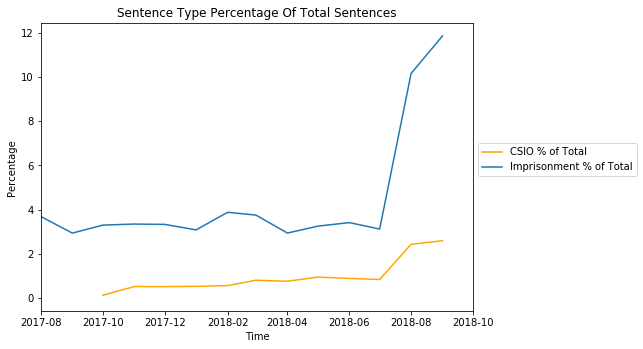

In [53]:
fig = plt.figure()
#fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.add_axes([0.1,0.1,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Percentage')
ax.set_title('Sentence Type Percentage Of Total Sentences')
ax.set_xlim(pd.Timestamp('2017-08-01'),pd.Timestamp('2018-10-01'))
#ax.set_ylim(-100,100)
#ax.plot(train6['CBO % of Total'], label='Community Based Order')
#ax.plot(train6['CRO % of Total'], label='Conditional Release Order')
ax.plot(train6['CSIO % of Total'], label='CSIO % of Total', color = 'orange')

# Note: Fines is the largest component
#ax.plot(train6['Fines % of Total'], label='Fines % of Total')

#ax.plot(train6['GBB % of Total'], label='GBB % of Total')
ax.plot(train6['Imprisonment % of Total'], label='Imprisonment % of Total')
#ax.plot(train6['Imprisonment for Fines % of Total'], label='Imprisonment for Fines % of Total')
#ax.plot(train6['ISO % of Total'], label='ISO % of Total')
#ax.plot(train6['No Punishment % of Total'], label='No Punishment % of Total')
#ax.plot(train6['Other % of Total'], label='Other % of Total')
#ax.plot(train6['Suspended Imprisonment % of Total'], label='Suspended Imprisonment % of Total')
#ax.plot(train6['WDO % of Total'], label='WDO % of Total')
#ax.plot(train6['YCBO % of Total'], label='YCBO % of Total')
#ax.plot(train6['YGBB % of Total'], label='YGBB % of Total')
ax.legend(bbox_to_anchor=(1.0,0.6))

In [54]:
display_all(train6.tail())

SentenceType,Community Based Order,Conditional Release Order,Conditional Suspended Imprisonment,Fines,Good Behaviour Bond,Imprisonment,Imprisonment for Fines,Intensive Supervision Order,No Punishment,Other,Suspended Imprisonment,Work and Development Order,Youth Community Based Order,Youth Good Behaviour Bond,Total,CBO % of Total,CRO % of Total,CSIO % of Total,Fines % of Total,GBB % of Total,Imprisonment % of Total,Imprisonment for Fines % of Total,ISO % of Total,No Punishment % of Total,Other % of Total,Suspended Imprisonment % of Total,WDO % of Total,YCBO % of Total,YGBB % of Total
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-01,335.0,80.0,68.0,6142.0,2.0,233.0,7.0,82.0,3.0,40.0,169.0,8.0,NaN,NaN,7169.0,4.672897,1.115916,0.948528,85.674432,0.027898,3.250105,0.097643,1.143814,0.041847,0.557958,2.357372,0.111592,NaN,NaN
2018-06-01,269.0,79.0,58.0,5629.0,9.0,223.0,4.0,68.0,1.0,36.0,162.0,2.0,NaN,NaN,6540.0,4.113150,1.207951,0.886850,86.070336,0.137615,3.409786,0.061162,1.039755,0.015291,0.550459,2.477064,0.030581,NaN,NaN
2018-07-01,278.0,80.0,60.0,6218.0,7.0,223.0,4.0,71.0,NaN,30.0,173.0,3.0,NaN,NaN,7147.0,3.889744,1.119351,0.839513,87.001539,0.097943,3.120190,0.055968,0.993424,NaN,0.419757,2.420596,0.041976,NaN,NaN
2018-08-01,207.0,28.0,56.0,1521.0,5.0,234.0,NaN,89.0,NaN,28.0,137.0,NaN,NaN,NaN,2305.0,8.980477,1.214751,2.429501,65.986985,0.216920,10.151844,NaN,3.861171,NaN,1.214751,5.943601,NaN,NaN,NaN
2018-09-01,26.0,1.0,7.0,168.0,1.0,32.0,NaN,10.0,NaN,NaN,25.0,NaN,NaN,NaN,270.0,9.629630,0.370370,2.592593,62.222222,0.370370,11.851852,NaN,3.703704,NaN,NaN,9.259259,NaN,NaN,NaN


In [55]:
train6['CSIO % of Total'].corr(train6['Imprisonment % of Total'])

0.9005163642258718

In [56]:
# Create a new column deriving CSIO monthly percentage increase
train6['CSIO % Total Increase'] = ((train6['CSIO % of Total'] / train6['CSIO % of Total'].shift(1)) - 1) *100

In [57]:
# Create a new column deriving CSIO monthly percentage increase
train6['Imprisonment % Total Increase'] = ((train6['Imprisonment % of Total'] / train6['Imprisonment % of Total'].shift(1)) - 1) *100

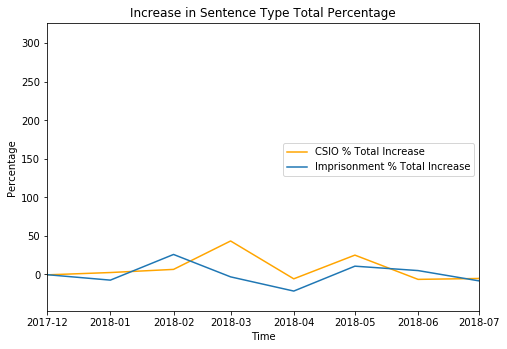

In [58]:
fig = plt.figure()
#fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.add_axes([0.1,0.1,1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Percentage')
ax.set_title('Increase in Sentence Type Total Percentage')
ax.set_xlim(pd.Timestamp('2017-12-01'),pd.Timestamp('2018-07-01'))
#ax.set_ylim(-100,100)
ax.plot(train6['CSIO % Total Increase'], label="CSIO % Total Increase", color = 'orange')
ax.plot(train6['Imprisonment % Total Increase'], label="Imprisonment % Total Increase")
ax.legend(bbox_to_anchor=(1.0,0.6))

In [59]:
train6['CSIO % Total Increase'].corr(train6['Imprisonment % Total Increase'])

0.44233348257524546